In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import  precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import  accuracy_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
digits = load_digits()

In [3]:
X, y = digits.data, digits.target

In [4]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#standart scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#dimension reduction
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [8]:
X_train_pca

array([[-2.05900914,  1.16235112,  3.75755837, ..., -0.18862317,
        -0.12995365,  0.56732867],
       [ 3.3942373 ,  0.9516551 , -0.74516164, ...,  0.16590501,
         0.03474571, -0.44648982],
       [-4.35096588, -0.78635006,  1.90592304, ..., -0.47913769,
        -0.09184926,  0.83889989],
       ...,
       [-5.67561501, -0.86208812,  0.2830373 , ...,  0.11625306,
        -0.1555572 ,  0.29433486],
       [ 3.39266601, -0.71986017,  1.0051821 , ..., -0.52966682,
         0.61603436, -0.30634928],
       [ 1.857093  ,  0.60709435,  0.32368284, ..., -0.82728548,
        -0.05056881,  0.06115306]], shape=(1437, 40))

In [9]:
X_test_pca

array([[-1.74306812,  0.72806254,  0.82670939, ..., -0.42096802,
        -1.32459442, -0.78468566],
       [-0.55189131,  3.08500517,  0.53471305, ..., -0.33494682,
         0.21911455,  0.23770965],
       [ 0.97086289,  4.29837428,  0.47313911, ..., -0.08103326,
        -0.35609206,  0.8949278 ],
       ...,
       [-3.15749737, -0.19957377,  0.86509774, ...,  0.05325689,
         0.37964375, -0.07332058],
       [-1.16250563, -3.76305361,  1.39124048, ..., -0.05846575,
         0.25219329,  0.2645639 ],
       [-2.0356989 ,  6.26621178, -0.63272994, ...,  1.14266509,
         1.1685112 , -1.05325812]], shape=(360, 40))

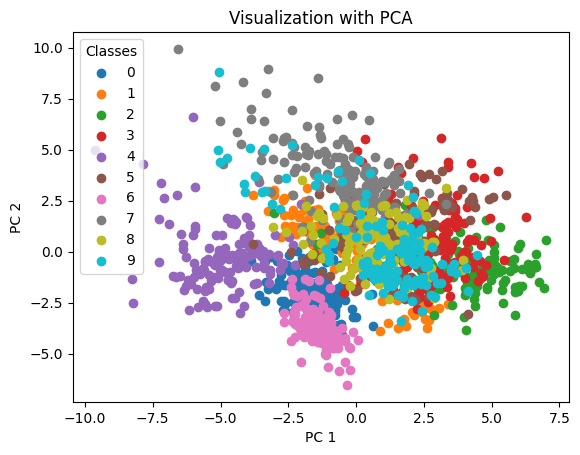

In [10]:
# Define the number of principal components as 2
pca_2d = PCA(n_components=2)

# Apply PCA transformation to the training data
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

# Apply the same PCA transformation to the test data
X_test_pca_2d = pca_2d.transform(X_test_scaled)

plt.figure()

# Loop through unique classes to plot them separately
for i in np.unique(y_train):
    plt.scatter(
        X_train_pca_2d[y_train == i, 0],  # First principal component (X-axis)
        X_train_pca_2d[y_train == i, 1],  # Second principal component (Y-axis)
        label=digits.target_names[i]  # Add class labels
    )

plt.xlabel("PC 1") 
plt.ylabel("PC 2")    
plt.title("Visualization with PCA")    
plt.legend(title = "Classes" , loc ="best")

In [11]:

#svm
svm_params = {"C":[0.1,1,10], "kernel": ["linear","rbf"]}
svm = SVC()
svm_grid = GridSearchCV(svm,svm_params, cv=5)
svm_grid.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [12]:
#random forest
rf_params = {"n_estimators": [50,100,200]}
rf = RandomForestClassifier(random_state = 42)
rf_grid = GridSearchCV(rf,rf_params, cv=5)
rf_grid.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [50, 100, 200]})

In [14]:
#knn
knn_params = {"n_neighbors": [3,5,7]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn,knn_params, cv=5)
knn_grid.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7]})

In [15]:
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_knn = knn_grid.best_estimator_

In [16]:
#voting classifier
voting_clf = VotingClassifier(estimators=[
    ("svm", best_svm),
    ("rf", best_rf),
    ("knn", best_knn)], voting = "hard")

voting_clf.fit(X_train_pca,y_train)
y_pred = voting_clf.predict(X_test_pca)

In [17]:
y_pred[:100]

array([8, 7, 7, 8, 0, 9, 1, 1, 2, 1, 1, 6, 0, 5, 8, 8, 6, 8, 0, 6, 5, 2,
       1, 3, 9, 6, 9, 2, 3, 6, 9, 8, 2, 3, 7, 5, 2, 8, 2, 8, 5, 8, 7, 6,
       0, 3, 3, 7, 4, 7, 5, 4, 3, 2, 7, 2, 3, 9, 3, 6, 2, 1, 6, 4, 8, 2,
       7, 4, 6, 2, 1, 2, 1, 9, 7, 3, 5, 1, 5, 9, 4, 5, 4, 3, 6, 1, 8, 8,
       9, 1, 0, 4, 8, 6, 4, 9, 5, 0, 3, 8])

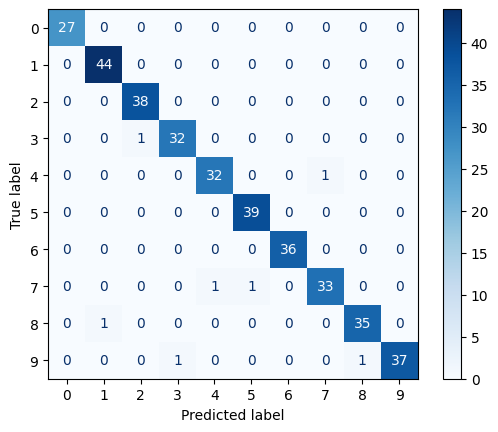

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap = plt.cm.Blues)

In [19]:
print(f"best svm params: {svm_grid.best_params_}")

best svm params: {'C': 10, 'kernel': 'rbf'}


In [20]:
print(f"best rf params: {rf_grid.best_params_}")

best rf params: {'n_estimators': 200}


In [21]:
print(f"best knn params: {knn_grid.best_params_}")

best knn params: {'n_neighbors': 3}


In [22]:
print(f"voting Classifier accuracy: {voting_clf.score(X_test_pca,y_test)}")

voting Classifier accuracy: 0.9805555555555555
